# Préparation du dataset

## Import du dataset

In [1]:
import pandas as pd

# Chemin vers le fichier CSV
csv_path = "flipkart_ecommerce_sample_1050.csv"

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv(csv_path, delimiter=',')

In [2]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


## préparation des données textuel

In [3]:
df.description[1]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel'

In [4]:
# Sélection de la colonne 'description'
product_descriptions = df['description']

In [5]:
import re

def extract_color(description):
    color_match = re.search(r'Color (\w+)', description)
    if color_match:
        return color_match.group(1)
    else:
        return 'N/A'  # Valeur par défaut si la couleur n'est pas trouvée

# Ajouter une colonne 'color' au DataFrame
df['color'] = product_descriptions.apply(extract_color)


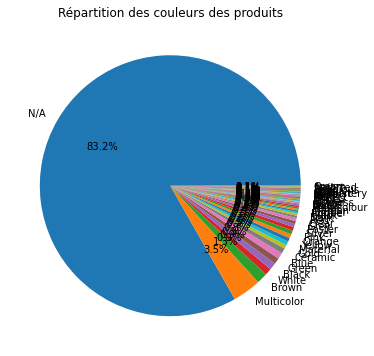

In [6]:
import matplotlib.pyplot as plt

color_counts = df['color'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(color_counts, labels=color_counts.index, autopct='%1.1f%%')
plt.title('Répartition des couleurs des produits')
plt.show()


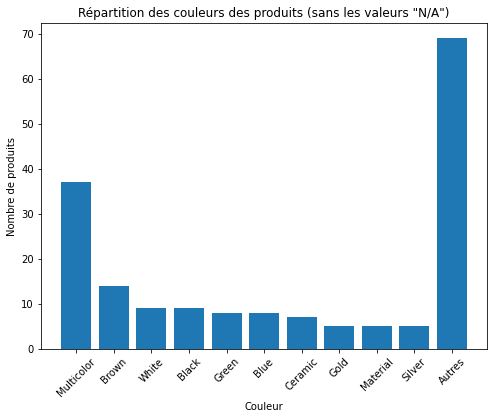

In [7]:
import matplotlib.pyplot as plt

# Filtrer les données pour inclure uniquement les couleurs non "N/A"
filtered_df = df[df['color'] != 'N/A']

# Compter les occurrences des couleurs
color_counts = filtered_df['color'].value_counts()

# Nombre maximum de couleurs à afficher distinctement
max_colors = 10

# Séparer les couleurs principales et les autres
top_colors = color_counts[:max_colors]
other_colors = color_counts[max_colors:]

# Regrouper les couleurs moins fréquentes sous une catégorie "Autres"
other_colors_total = other_colors.sum()
top_colors['Autres'] = other_colors_total

# Créer le graphique
plt.figure(figsize=(8, 6))
plt.bar(top_colors.index, top_colors)
plt.title('Répartition des couleurs des produits (sans les valeurs "N/A")')
plt.xlabel('Couleur')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)
plt.show()

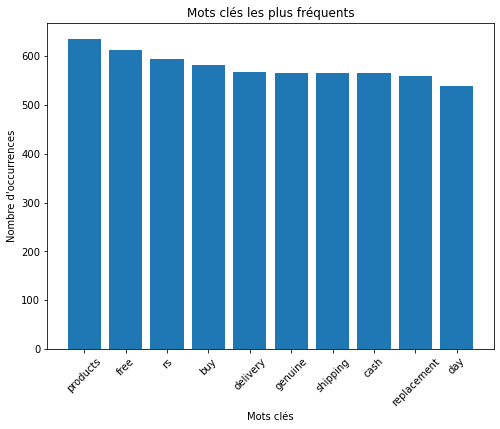

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Approche 1 : Analyse des mots clés
def extract_keywords(description):
    # Suppression des mots vides et des caractères spéciaux
    stop_words = set(stopwords.words('english'))
    description = re.sub(r'[^\w\s]', '', description)
    keywords = [word.lower() for word in description.split() if word.lower() not in stop_words]
    return keywords

# Extraction des mots clés
df['keywords'] = df['description'].apply(extract_keywords)

# Comptage des mots clés
keywords_counts = Counter([keyword for keywords in df['keywords'] for keyword in keywords])

# Affichage des 10 mots clés les plus fréquents
top_keywords = dict(keywords_counts.most_common(10))
plt.figure(figsize=(8, 6))
plt.bar(top_keywords.keys(), top_keywords.values())
plt.title('Mots clés les plus fréquents')
plt.xlabel('Mots clés')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

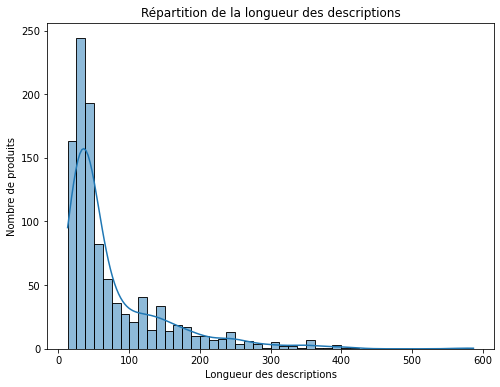

In [9]:
# Approche 2 : Analyse de la longueur des descriptions
df['description_length'] = df['description'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(df['description_length'], kde=True)
plt.title('Répartition de la longueur des descriptions')
plt.xlabel('Longueur des descriptions')
plt.ylabel('Nombre de produits')
plt.show()

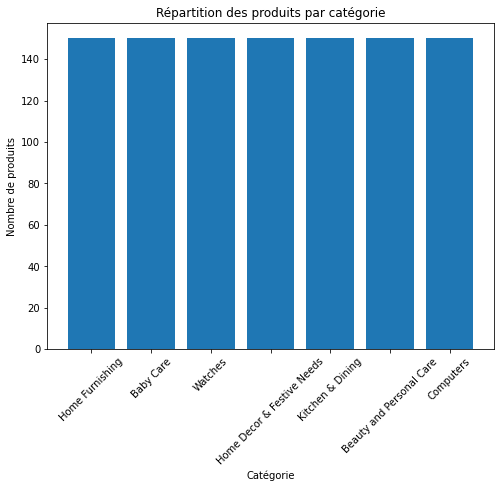

In [10]:
# Approche 3 : Classification des produits


# Récupérer la catégorie principale de la colonne 'product_category_tree'
df['main_category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0].strip()).str.lstrip('["')

category_counts = df['main_category'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts)
plt.title('Répartition des produits par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)
plt.show()

2023-05-30 10:53:36.431658: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-30 10:53:36.491982: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 10:53:36.881109: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-30 10:53:36.882755: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-30 10:53:38.587393: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

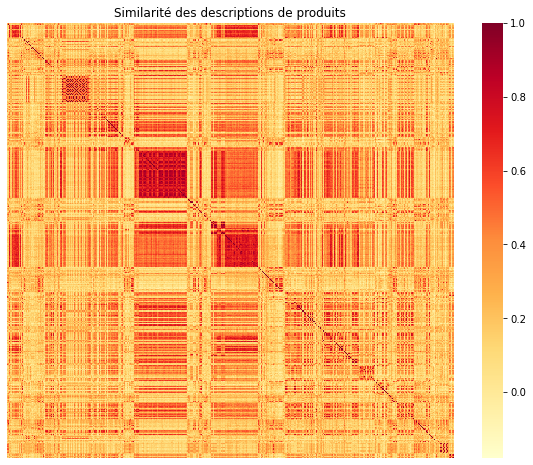

In [11]:
# Approche 4 : Analyse de la similarité des descriptions
import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf

# Chargement de l'Encodeur de phrases universel
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

# Calcul de la similarité des descriptions
description_vectors = embed(df['description'])
similarity_matrix = tf.matmul(description_vectors, tf.transpose(description_vectors))

plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix.numpy(), cmap='YlOrRd', xticklabels=False, yticklabels=False)
plt.title('Similarité des descriptions de produits')
plt.show()

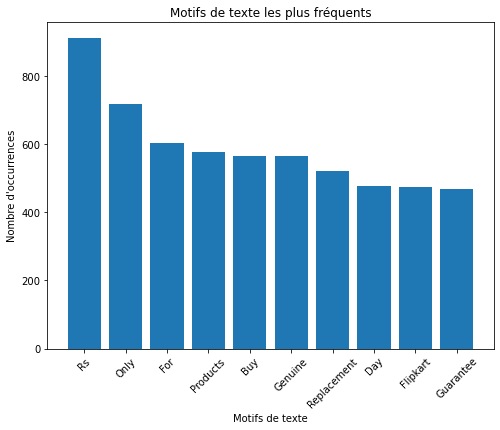

In [12]:
# Approche 5 : Analyse des motifs de texte
def extract_text_patterns(description):
    patterns = re.findall(r'[A-Z]\w+', description)  # Extraction des noms propres
    return patterns

df['text_patterns'] = df['description'].apply(extract_text_patterns)

text_patterns_counts = Counter([pattern for patterns in df['text_patterns'] for pattern in patterns])

top_text_patterns = dict(text_patterns_counts.most_common(10))
plt.figure(figsize=(8, 6))
plt.bar(top_text_patterns.keys(), top_text_patterns.values())
plt.title('Motifs de texte les plus fréquents')
plt.xlabel('Motifs de texte')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.show()

## préparation des données image

In [13]:
from PIL import Image
import os

In [14]:
# Fonction de redimensionnement des images
def resize_image(image_path, output_path, size):
    img = Image.open(image_path)
    img = img.resize(size)
    img.save(output_path)

In [15]:
# Dossier contenant les images
image_folder = "computervision_images"

# Dossier de destination pour les images redimensionnées
resized_folder = "resized_images"

# Créer le dossier de destination s'il n'existe pas
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Parcourir les lignes du DataFrame et redimensionner les images
for index, row in df.iterrows():
    image_name = row['uniq_id']+'.jpg'
    image_path = os.path.join(image_folder, image_name)
    output_path = os.path.join(resized_folder, image_name)
    if os.path.exists(image_path):
        resize_image(image_path, output_path, (224, 224))
    else:
        print(f"Image not found: {image_name}")


Image not found: d4684dcdc759dd9cdf41504698d737d8.jpg
Image not found: f355cc1ccb08bd0d283ed979b7ee7515.jpg
Image not found: dd0e3470a7e6ed76fd69c2da27721041.jpg
Image not found: d7ca2b06b4f4d3b98c61c377b18a2d6b.jpg
Image not found: f74476ba64365d97a5be7d375cbf4c7a.jpg
Image not found: fda50982a672ef8835de5c1cc86f8bfc.jpg
Image not found: ee8d9ff65e0fe4278afce7c933d30941.jpg
Image not found: f0938b0d88eac91deee6d5add54097d3.jpg
Image not found: e9420e9483f16db81c64dddf99f34841.jpg
Image not found: d1899ab1d5c79ddaa311bc9f04d198ed.jpg
Image not found: e7cab08a267e815c72a26513222783e0.jpg
Image not found: f01140c02fd09e5c56312a64fa8db3da.jpg
Image not found: e2ae2af58ac50adf4881751ae84a9d8a.jpg
Image not found: f4e7f269319ba9cf5507a9e2febacbf5.jpg
Image not found: ed9817e8960a6a0d509061c54cfe5ac1.jpg
Image not found: f2658bad8c2b7d5b08984c6ac34267f7.jpg
Image not found: e8ee7868b0c3d1d04b482cd4f3ec5ccc.jpg
Image not found: d1e18b4a3aafb0040da2111c8b8ce2e5.jpg
Image not found: f4d4c2eec77

/home/antoine/Workspace/anaconda3/lib/python3.9/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Image not found: fd10586bf7f01bc57e0c5364d4b2c3f7.jpg
Image not found: ead122f4b1da293eb2d719baf104dfc9.jpg
Image not found: d61b368146f83075937e144dab93c6a1.jpg
Image not found: cdc33ed715261b08e315a2a19427bc23.jpg
Image not found: ff24511994fc459d04145231c8876d6c.jpg
Image not found: ce9207944cedeaa82e4ea6269586af2a.jpg
Image not found: d68b774e9529a4b94a5c6c8943a1b8b3.jpg
Image not found: eda00df2c5e1d006a8608e881bfcf300.jpg
Image not found: fd75569f00649bda69d490d54e01378c.jpg
Image not found: cc2acb156df3202f172b280132ab459a.jpg
Image not found: cabeeb2c7f68a833964bf7329d360886.jpg
Image not found: ed1a2a831475966a779524ba67ae2ac7.jpg
Image not found: f28dbe6996336f063e804f353d7de4ce.jpg
Image not found: e33795f66b2a42ac56095ae704ab25b6.jpg
Image not found: fd53c8ed19e77c3e65d767e6aee5fad7.jpg
Image not found: d47f1cb78db4a23e2516e2d34da34c8a.jpg
Image not found: daf06eb2b9613900299539558e287701.jpg
Image not found: e80e5151787eb21b0cca0d7dc3b0c338.jpg
Image not found: fc93a41f31c

In [16]:
import pandas as pd
import os
from PIL import Image

# Dossier contenant les images
image_folder = "resized_images"

# Créer une nouvelle colonne 'image_path' pour stocker le chemin de l'image correspondante
df['image_path'] = df['pid'].apply(lambda x: os.path.join(image_folder, x+'.jpg') if os.path.exists(os.path.join(image_folder, x+'.jpg')) else None)

# Charger les images et récupérer les dimensions
df['image_size'] = df['image_path'].apply(lambda x: Image.open(x).size if x is not None else None)

# Récupérer la catégorie principale de la colonne 'product_category_tree'
df['main_category'] = df['product_category_tree'].apply(lambda x: x.split('>>')[0].strip())

In [17]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,color,keywords,description_length,main_category,text_patterns,image_path,image_size
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,...,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Multicolor,"[key, features, elegance, polyester, multicolo...",230,"[""Home Furnishing","[Key, Features, Elegance, Polyester, Multicolo...",None,None
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,...,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Red,"[specifications, sathiyas, cotton, bath, towel...",74,"[""Baby Care","[Specifications, Sathiyas, Cotton, Bath, Towel...",None,None
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,...,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Assorted,"[key, features, eurospa, cotton, terry, face, ...",215,"[""Baby Care","[Key, Features, Eurospa, Cotton, Terry, Face, ...",None,None
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,...,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Multicolor,"[key, features, santosh, royal, fashion, cotto...",145,"[""Home Furnishing","[Key, Features, SANTOSH, ROYAL, FASHION, Cotto...",None,None
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,...,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",White,"[key, features, jaipur, print, cotton, floral,...",214,"[""Home Furnishing","[Key, Features, Jaipur, Print, Cotton, Floral,...",None,None


In [18]:
df['main_category'] = df['main_category'].str.lstrip('["')

In [19]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,...,overall_rating,brand,product_specifications,color,keywords,description_length,main_category,text_patterns,image_path,image_size
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,"[""http://img6a.flixcart.com/image/curtain/q/8/...",False,...,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Multicolor,"[key, features, elegance, polyester, multicolo...",230,Home Furnishing,"[Key, Features, Elegance, Polyester, Multicolo...",None,None
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,"[""http://img6a.flixcart.com/image/bath-towel/z...",False,...,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa...",Red,"[specifications, sathiyas, cotton, bath, towel...",74,Baby Care,"[Specifications, Sathiyas, Cotton, Bath, Towel...",None,None
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,"[""http://img5a.flixcart.com/image/bath-towel/a...",False,...,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",...",Assorted,"[key, features, eurospa, cotton, terry, face, ...",215,Baby Care,"[Key, Features, Eurospa, Cotton, Terry, Face, ...",None,None
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,"[""http://img6a.flixcart.com/image/bedsheet/d/r...",False,...,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v...",Multicolor,"[key, features, santosh, royal, fashion, cotto...",145,Home Furnishing,"[Key, Features, SANTOSH, ROYAL, FASHION, Cotto...",None,None
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,"[""http://img6a.flixcart.com/image/bedsheet/w/q...",False,...,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa...",White,"[key, features, jaipur, print, cotton, floral,...",214,Home Furnishing,"[Key, Features, Jaipur, Print, Cotton, Floral,...",None,None


In [20]:
# Créer le nouveau DataFrame
data = pd.DataFrame()

# Ajouter la colonne 'uniq_id'
data['uniq_id'] = df['uniq_id']

# Ajouter la colonne 'label_name' au nouveau DataFrame
data['label_name'] = df['main_category']

# Créer la colonne 'image_path' en concaténant 'uniq_id' avec '.jpg'
data['image_path'] = df['uniq_id'] + '.jpg'

# Créer un dictionnaire pour mapper les valeurs uniques avec des numéros
label_mapping = {label: idx+1 for idx, label in enumerate(data['label_name'].unique())}

# Créer la colonne 'label' en utilisant le mapping
data['label'] = data['label_name'].map(label_mapping)

In [21]:
data.head()

,uniq_id,label_name,image_path,label
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,2
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,2
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,1
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,1


In [22]:
data.groupby("label").count()

,uniq_id,label_name,image_path
label,,,
1,150,150,150
2,150,150,150
3,150,150,150
4,150,150,150
5,150,150,150
6,150,150,150
7,150,150,150


## Affichage d'exemples d'images par label

In [23]:
df_sift = data

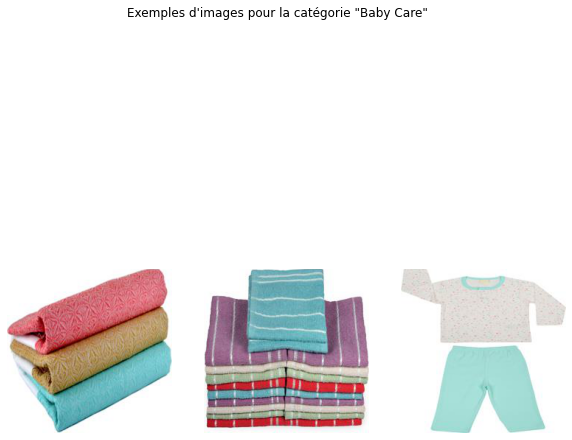

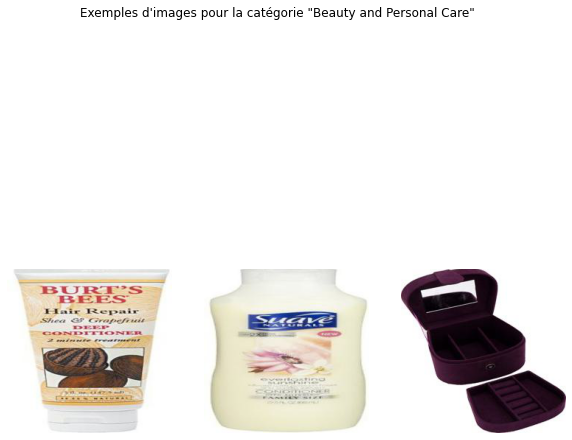

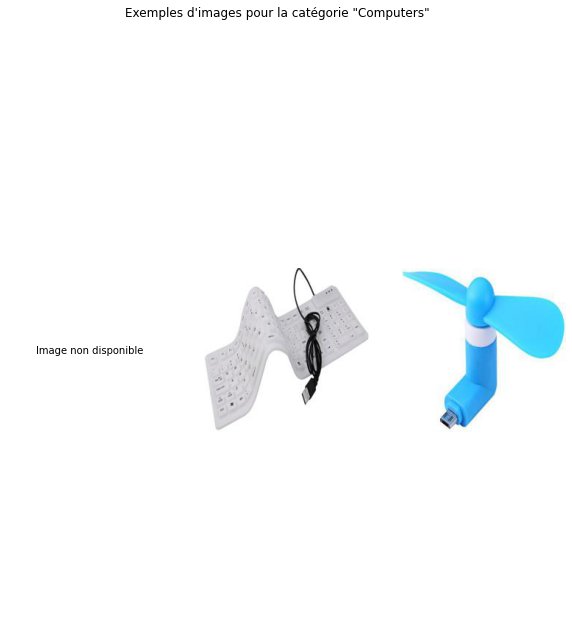

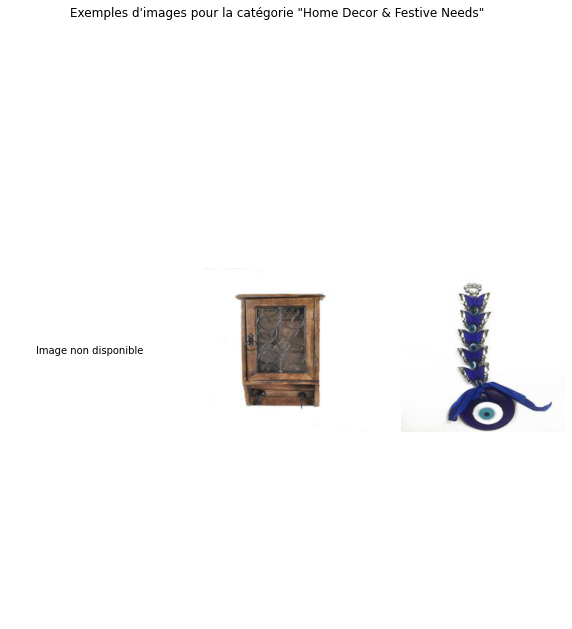

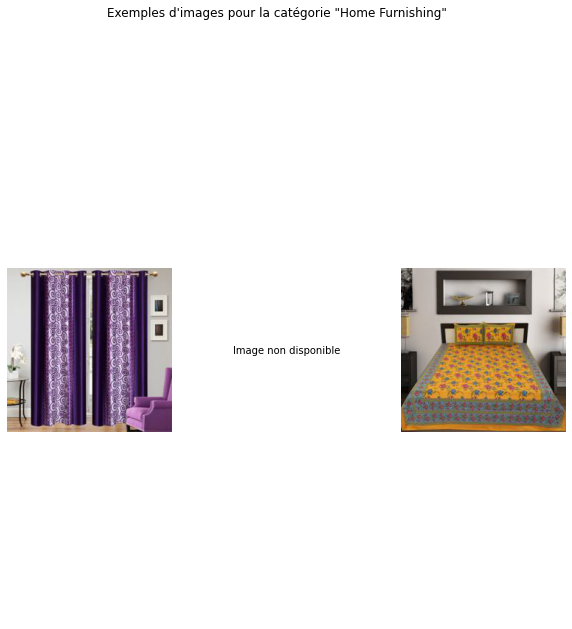

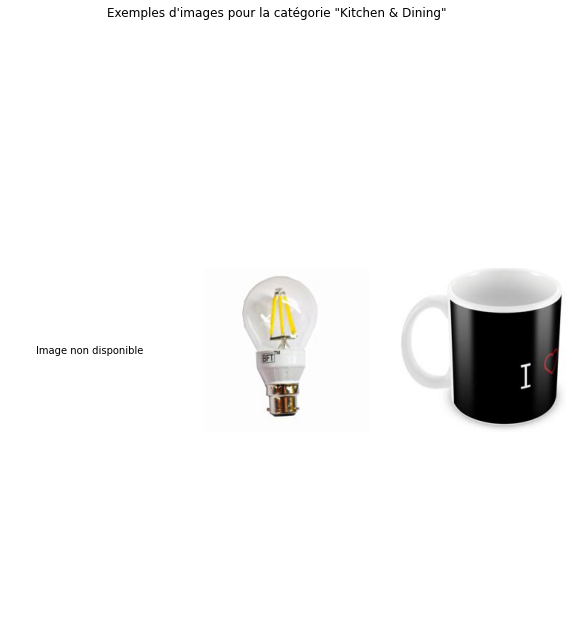

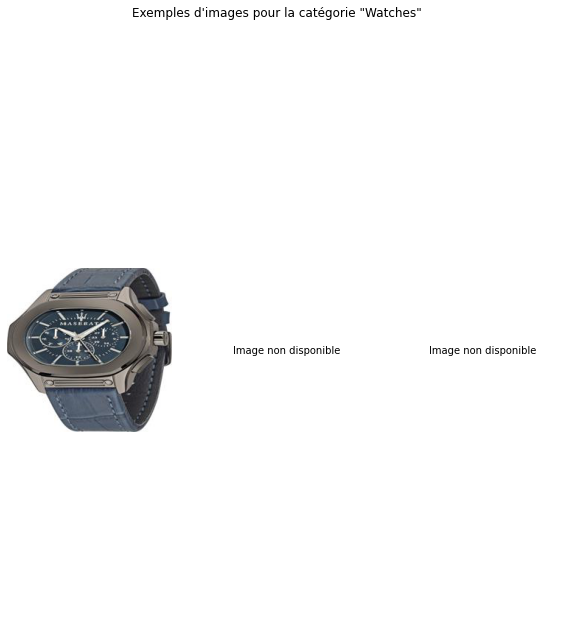

In [24]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Définir le nombre d'exemples d'images à afficher par catégorie
num_examples = 3

# Grouper le DataFrame par la colonne 'label_name'
grouped_df = df_sift.groupby('label_name')

# Parcourir chaque groupe
for label_name, group in grouped_df:
    # Obtenir les noms de fichiers des images à afficher
    image_paths = group['image_path'].head(num_examples)
    
    # Afficher les images
    fig, axs = plt.subplots(1, num_examples, figsize=(10, 10))
    fig.suptitle(f'Exemples d\'images pour la catégorie "{label_name}"')
    
    for i, image_path in enumerate(image_paths):
        image_file = os.path.join('resized_images', image_path)
        
        if os.path.exists(image_file):
            img = mpimg.imread(image_file)
            axs[i].imshow(img)
            axs[i].axis('off')
        else:
            axs[i].text(0.5, 0.5, 'Image non disponible', horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
            axs[i].axis('off')
    
    plt.show()


In [25]:
import os

# Vérifier l'existence de chaque image dans le DataFrame
existing_images = []
for index, row in df_sift.iterrows():
    image_file = os.path.join('resized_images', row['image_path'])
    if os.path.exists(image_file):
        existing_images.append(index)

# Créer un nouveau DataFrame contenant uniquement les images existantes
df_sift = df_sift.loc[existing_images].reset_index(drop=True)

In [26]:
df_sift.head()

,uniq_id,label_name,image_path,label
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,2
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,2
3,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,1
4,893aa5ed55f7cff2eccea7758d7a86bd,Watches,893aa5ed55f7cff2eccea7758d7a86bd.jpg,3


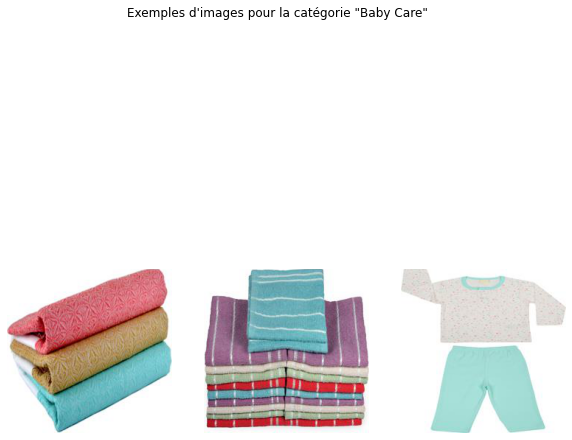

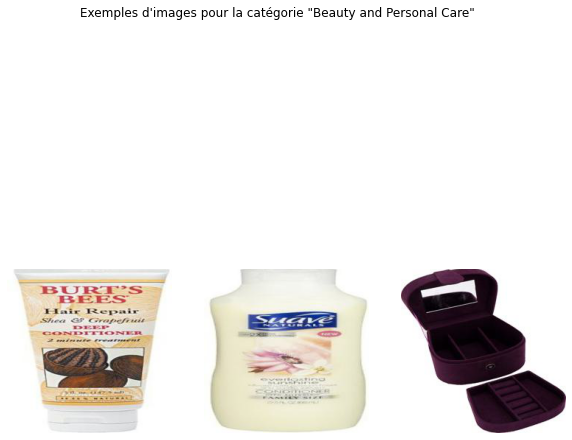

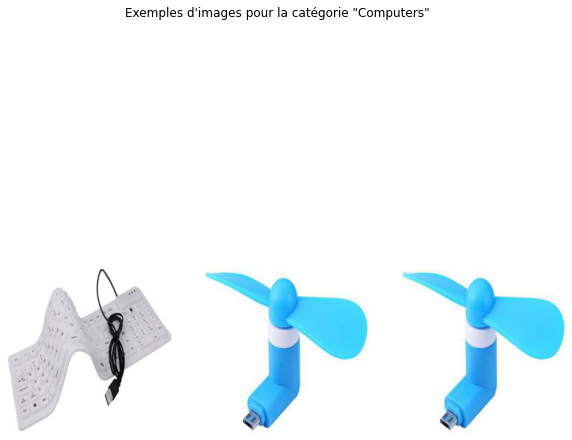

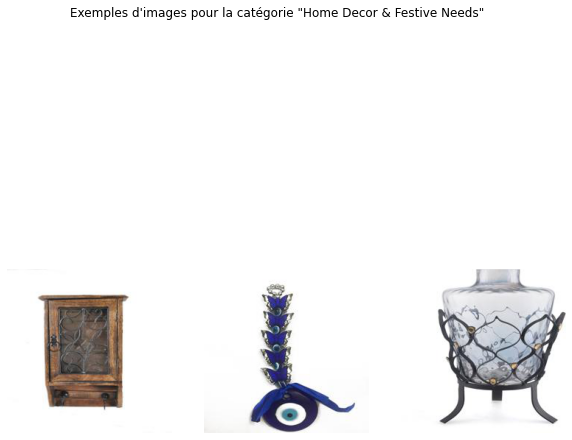

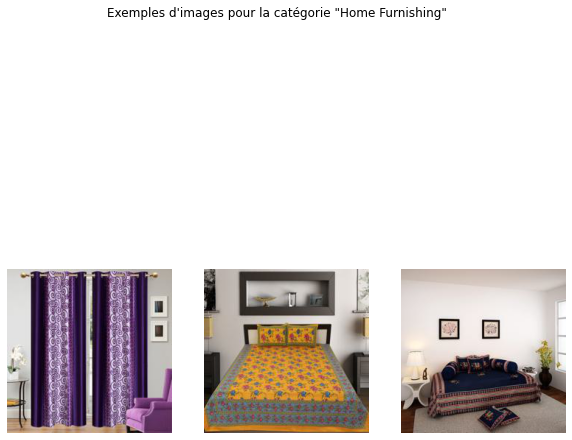

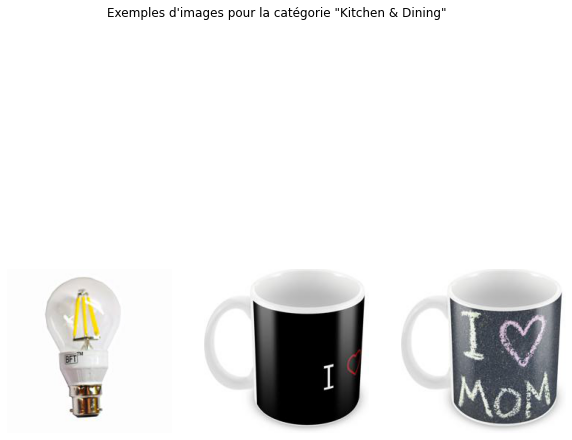

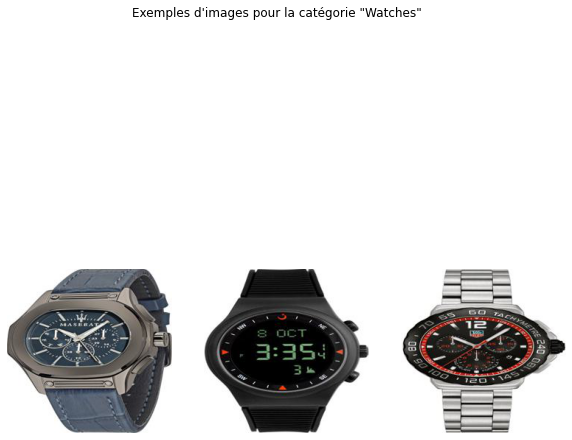

In [27]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Définir le nombre d'exemples d'images à afficher par catégorie
num_examples = 3

# Grouper le DataFrame par la colonne 'label_name'
grouped_df = df_sift.groupby('label_name')

# Parcourir chaque groupe
for label_name, group in grouped_df:
    # Obtenir les noms de fichiers des images à afficher
    image_paths = group['image_path'].head(num_examples)
    
    # Afficher les images
    fig, axs = plt.subplots(1, num_examples, figsize=(10, 10))
    fig.suptitle(f'Exemples d\'images pour la catégorie "{label_name}"')
    
    for i, image_path in enumerate(image_paths):
        image_file = os.path.join('resized_images', image_path)
        
        if os.path.exists(image_file):
            img = mpimg.imread(image_file)
            axs[i].imshow(img)
            axs[i].axis('off')
        else:
            axs[i].text(0.5, 0.5, 'Image non disponible', horizontalalignment='center', verticalalignment='center', transform=axs[i].transAxes)
            axs[i].axis('off')
    
    plt.show()

## Détermination et affichage des descripteurs SIFT

In [28]:
import cv2

## Pré-traitement des images via SIFT

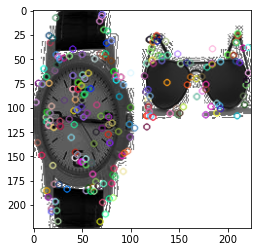

Descripteurs :  (242, 128)

[[ 59.  10.   0. ...   0.   0.  11.]
 [ 41.  16.   0. ...   0.   0.   0.]
 [143.  25.   0. ...   0.   0.   2.]
 ...
 [  2.   1.   0. ...   0.   0.   7.]
 [138.  11.   1. ...   0.   0.   0.]
 [ 23. 128.  54. ...   0.   0.   7.]]


In [29]:
sift =  cv2.SIFT_create()
image = cv2.imread(os.path.join('resized_images', df_sift['image_path'][7]),0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

## Création des clusters de descripteurs

In [30]:
# identification of key points and associated descriptors
import time, cv2
import numpy as np

sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(df_sift)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(os.path.join('resized_images', df_sift['image_path'][image_num]),0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800

Nombre de descripteurs :  (276860, 128)
temps de traitement SIFT descriptor :            10.68 secondes


/tmp/ipykernel_65369/2097166178.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_by_img = np.asarray(sift_keypoints)


In [31]:
len(sift_keypoints)

855

In [32]:
len(sift_keypoints_all)

276860

In [33]:
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
k

526

In [34]:
pd.DataFrame(sift_keypoints_all).isnull().sum().sort_values(ascending = False)[0:30]

0     0
1     0
94    0
93    0
92    0
91    0
90    0
89    0
88    0
87    0
86    0
85    0
84    0
83    0
82    0
81    0
80    0
79    0
78    0
77    0
76    0
75    0
74    0
73    0
72    0
71    0
70    0
69    0
68    0
67    0
dtype: int64

In [35]:
a = pd.DataFrame(sift_keypoints_all)
a[a.notnull()]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.0,0.0,10.0,18.0,2.0,1.0,1.0,2.0,0.0,0.0,...,97.0,41.0,21.0,73.0,28.0,0.0,0.0,31.0,74.0,28.0
1,3.0,9.0,130.0,40.0,0.0,0.0,0.0,0.0,65.0,25.0,...,69.0,0.0,2.0,99.0,113.0,0.0,2.0,18.0,30.0,3.0
2,0.0,1.0,26.0,55.0,0.0,1.0,0.0,0.0,8.0,60.0,...,4.0,13.0,0.0,0.0,3.0,3.0,1.0,0.0,1.0,2.0
3,12.0,4.0,0.0,0.0,76.0,32.0,1.0,4.0,58.0,33.0,...,31.0,10.0,2.0,3.0,3.0,2.0,14.0,22.0,14.0,5.0
4,3.0,3.0,3.0,3.0,7.0,8.0,2.0,2.0,33.0,19.0,...,1.0,75.0,3.0,3.0,13.0,29.0,13.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276855,52.0,148.0,7.0,23.0,2.0,0.0,0.0,1.0,127.0,159.0,...,6.0,10.0,0.0,8.0,5.0,18.0,17.0,12.0,0.0,0.0
276856,0.0,2.0,29.0,134.0,3.0,0.0,3.0,22.0,63.0,39.0,...,5.0,50.0,1.0,0.0,0.0,0.0,0.0,0.0,12.0,34.0
276857,0.0,0.0,0.0,0.0,2.0,7.0,12.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,52.0,38.0,3.0,0.0,0.0,0.0
276858,48.0,21.0,0.0,0.0,0.0,0.0,1.0,1.0,176.0,60.0,...,8.0,16.0,6.0,128.0,107.0,32.0,3.0,0.0,2.0,3.0


In [36]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
#k=40
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  526
Création de 526 clusters de descripteurs ...


/home/antoine/Workspace/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


temps de traitement kmeans :             2.90 secondes


## Création des features des images

In [37]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
temps de création histogrammes :             1.01 secondes


## Réductions de dimension

In [38]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (855, 526)
Dimensions dataset après réduction PCA :  (855, 420)


In [39]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["label_name"]
print(df_tsne.shape)

(855, 3)


In [40]:
import seaborn as sns

## Analyse visuelle : affichage T-SNE selon catégories d'images

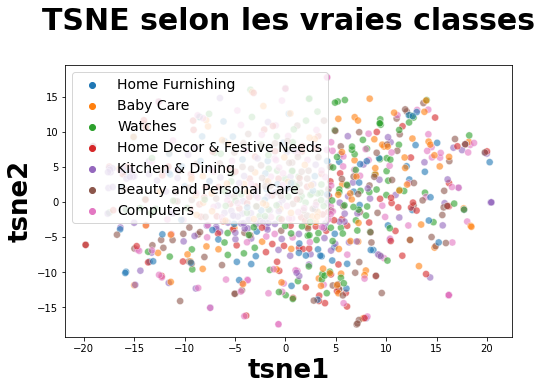

In [41]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

In [42]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(855, 4)


/home/antoine/Workspace/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

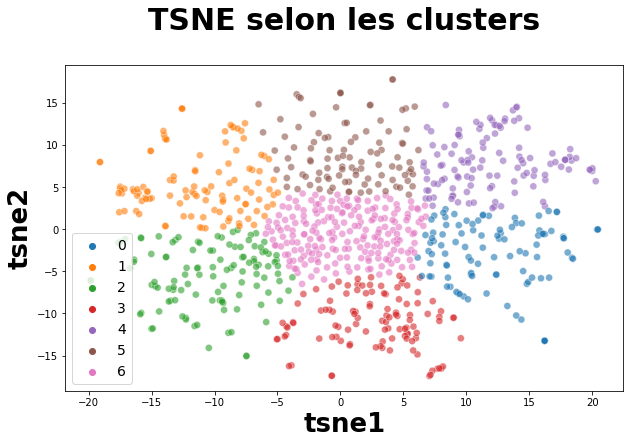

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

In [44]:
labels = df_sift["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

ARI :  0.043318975051508994


### Analyse par classes

In [45]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    103
1    109
2    113
3    109
4    116
5    101
6    204
Name: class, dtype: int64

In [46]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[ 0  0  0  0  0  0  0  0]
 [10  4  4 32 24 19 26  0]
 [11  8 15 30 11 13 37  0]
 [18 10 18 14 26 14 29  0]
 [ 7  7 18 15  4 13 59  0]
 [13 47 18  5 13 11 14  0]
 [29 10 14  7 15 21 24  0]
 [15 23 26  6 23 10 15  0]]


In [47]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 7]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 7]
[[24 19 32  4  4 10 26]
 [11 13 30 15  8 11 37]
 [26 14 14 18 10 18 29]
 [ 4 13 15 18  7  7 59]
 [13 11  5 18 47 13 14]
 [15 21  7 14 10 29 24]
 [23 10  6 26 23 15 15]]

              precision    recall  f1-score   support

           1       0.21      0.20      0.20       119
           2       0.13      0.10      0.12       125
           3       0.13      0.11      0.12       129
           4       0.16      0.15      0.15       123
           5       0.43      0.39      0.41       121
           6       0.28      0.24      0.26       120
           7       0.07      0.13      0.09       118

    accuracy                           0.19       855
   macro avg       0.20      0.19      0.19       855
weighted avg       0.20      0.19      0.19       855



In [48]:
index = df_sift['label_name'].drop_duplicates().tolist()
df_cm = pd.DataFrame(conf_mat, index=index, columns=index)

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

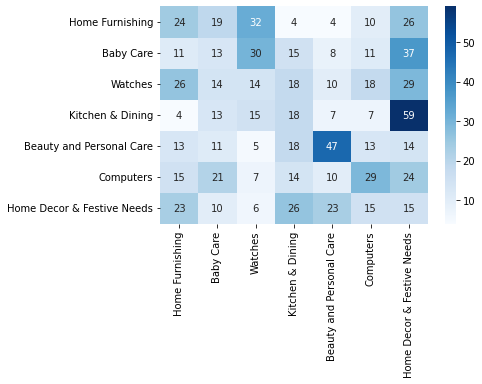

In [49]:
plt.figure(figsize = (6,4))
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

## Pré-traitement des images via ORB

In [50]:
df_orb = data

In [51]:
df_orb.head()

,uniq_id,label_name,image_path,label
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,2
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,2
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,1
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,1


In [52]:
import cv2
import os
import numpy as np
import pandas as pd

orb = cv2.ORB_create()

descriptors = []
for _, row in df_orb.iterrows():
    image_file = os.path.join('resized_images', row['image_path'])
    if os.path.exists(image_file):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        kp, des = orb.detectAndCompute(image, None)
        if des is not None:  # Vérifier si des est non vide
            descriptors.append(des)

descriptors = np.vstack(descriptors)  # Utilisation de np.vstack pour empiler verticalement les descripteurs
print("Number of descriptors:", descriptors.shape)

Number of descriptors: (280189, 32)


## clustering (K-means)

In [53]:
from sklearn.cluster import KMeans

k = 100  # Nombre de clusters souhaité
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(descriptors)
cluster_labels = kmeans.labels_

/home/antoine/Workspace/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


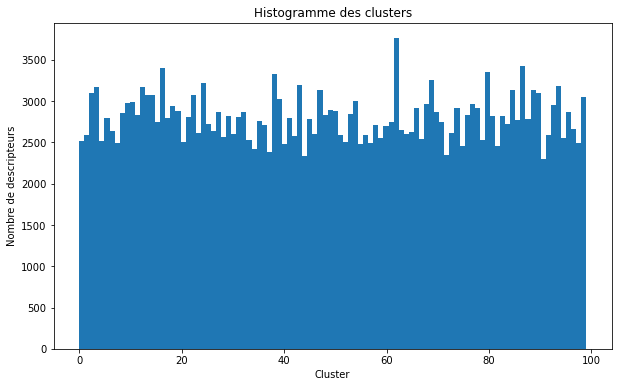

In [54]:
# Histogramme des clusters
plt.figure(figsize=(10, 6))
plt.hist(cluster_labels, bins=k)
plt.xlabel('Cluster')
plt.ylabel('Nombre de descripteurs')
plt.title('Histogramme des clusters')
plt.show()

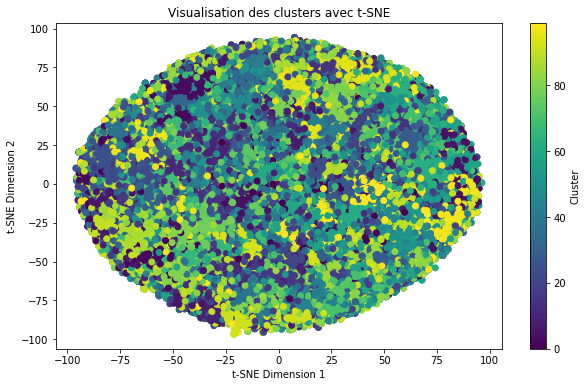

In [88]:
# Réduction de dimension avec t-SNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
descriptors_tsne = tsne.fit_transform(descriptors)

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 6))
plt.scatter(descriptors_tsne[:, 0], descriptors_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('Visualisation des clusters avec t-SNE')
plt.colorbar(label='Cluster')
plt.show()

## Recherche d'images similaires

In [89]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(descriptors)
distances, indices = nbrs.kneighbors(descriptors)

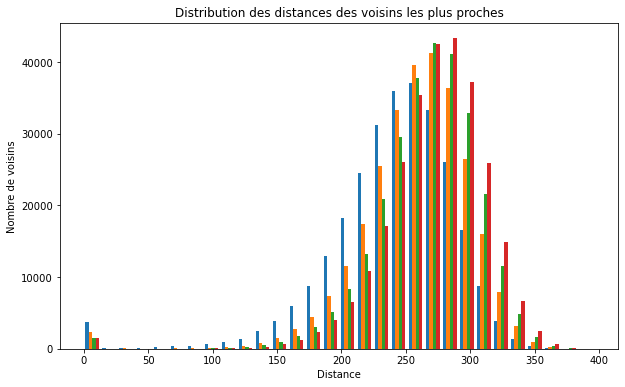

In [90]:
# Distribution des distances des voisins les plus proches
plt.figure(figsize=(10, 6))
plt.hist(distances[:, 1:], bins=30)
plt.xlabel('Distance')
plt.ylabel('Nombre de voisins')
plt.title('Distribution des distances des voisins les plus proches')
plt.show()

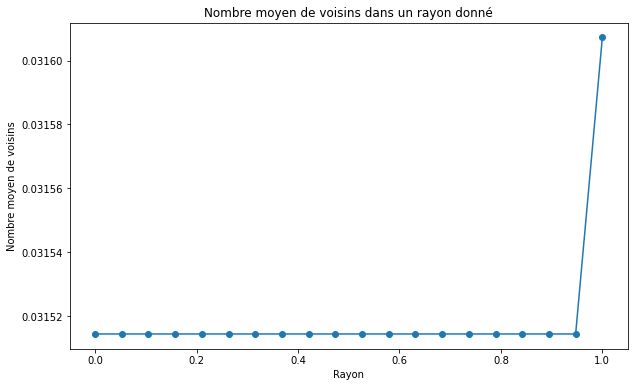

In [91]:
# Nombre moyen de voisins dans un rayon donné
radii = np.linspace(0, 1, 20)
avg_neighbors = []

for radius in radii:
    neighbors = np.mean(np.sum(distances[:, 1:] <= radius, axis=1))
    avg_neighbors.append(neighbors)

plt.figure(figsize=(10, 6))
plt.plot(radii, avg_neighbors, marker='o')
plt.xlabel('Rayon')
plt.ylabel('Nombre moyen de voisins')
plt.title('Nombre moyen de voisins dans un rayon donné')
plt.show()

## Classification d'images

In [94]:
from sklearn.svm import SVC

image_labels = df_orb['label'].values

# Extraire les noms de fichiers d'images de la colonne correspondante
image_files = df_orb['image_path'].values

# Vérifier que les fichiers d'images existent et filtrer les données en conséquence
existing_indices = [i for i, image_file in enumerate(image_files) if os.path.exists(os.path.join('resized_images', image_file))]
filtered_descriptors = descriptors[existing_indices]
filtered_labels = image_labels[existing_indices]

svm = SVC()
svm.fit(filtered_descriptors, filtered_labels)

SVC()

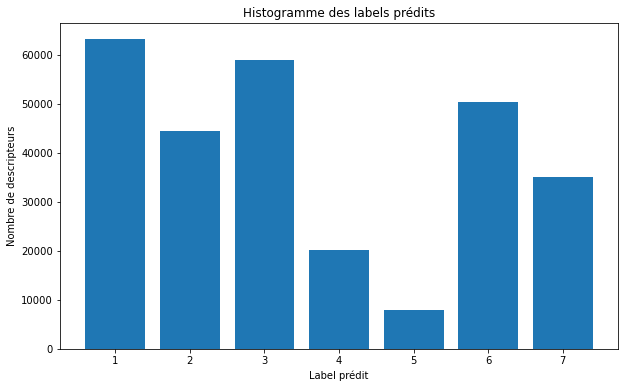

In [95]:
# Prédiction des labels pour les descripteurs
predicted_labels = svm.predict(descriptors)

# Histogramme des labels prédits
plt.figure(figsize=(10, 6))
unique_labels, label_counts = np.unique(predicted_labels, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Label prédit')
plt.ylabel('Nombre de descripteurs')
plt.title('Histogramme des labels prédits')
plt.show()

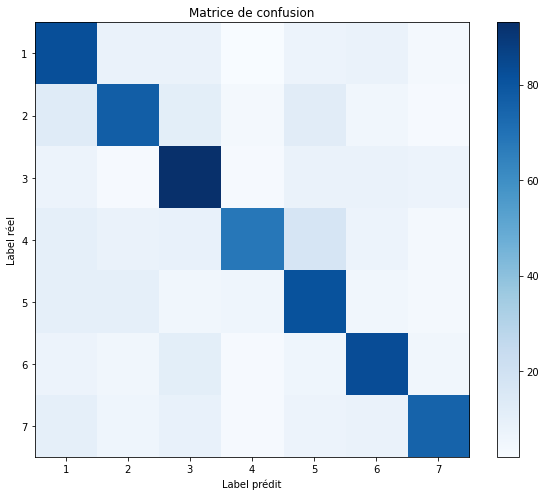

In [99]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

predicted_labels = svm.predict(descriptors)

existing_indices = [i for i, _ in enumerate(image_files) if os.path.exists(os.path.join('resized_images', _))]
filtered_image_labels = image_labels[existing_indices]
filtered_predicted_labels = predicted_labels[existing_indices]

conf_matrix = confusion_matrix(filtered_image_labels, filtered_predicted_labels)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels)
plt.yticks(tick_marks, unique_labels)
plt.xlabel('Label prédit')
plt.ylabel('Label réel')
plt.show()

## Pré-traitement des images via SURF

In [51]:
import cv2

# Créez un détecteur SURF
surf = cv2.xfeatures2d.SURF_create()

# Vérifiez si SURF est disponible
if surf is None:
    print("L'algorithme SURF n'est pas disponible.")
else:
    print("L'algorithme SURF est disponible.")

error: OpenCV(4.7.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [100]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Création du détecteur SURF
surf = cv2.xfeatures2d.SURF_create()

# Liste pour stocker les descripteurs
descriptors = []

# Parcours du dataframe et extraction des descripteurs pour chaque image
for _, row in df_orb.iterrows():
    image_file = os.path.join('resized_images', row['image_path'])
    if os.path.exists(image_file):
        image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        kp, des = surf.detectAndCompute(image, None)
        if des is not None:
            descriptors.append(des)

# Empilement des descripteurs
descriptors = np.vstack(descriptors)

print("Number of descriptors:", descriptors.shape)

error: OpenCV(4.7.0) /io/opencv_contrib/modules/xfeatures2d/src/surf.cpp:1026: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'create'


In [ ]:
# Entraînement du modèle SVM
image_labels = df_orb['label'].values
svm = SVC()
svm.fit(descriptors, image_labels)

# Prédiction des labels pour les descripteurs
predicted_labels = svm.predict(descriptors)

# Histogramme des labels prédits
plt.figure(figsize=(10, 6))
unique_labels, label_counts = np.unique(predicted_labels, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Label prédit')
plt.ylabel('Nombre de descripteurs')
plt.title('Histogramme des labels prédits')
plt.show()

In [ ]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(image_labels, predicted_labels)

# Affichage de la matrice de confusion
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matrice de confusion')
plt.colorbar()
tick_marks = np.arange(len(unique_labels))
plt.xticks(tick_marks, unique_labels)
plt.yticks(tick_marks, unique_labels)
plt.xlabel('Label prédit')
plt.ylabel('Label réel')
plt.show()

## modèles CNN

In [55]:
images = []

for _, row in data.iterrows():
    image_file = os.path.join('resized_images', row['image_path'])
    if os.path.exists(image_file):
        image = cv2.imread(image_file)
        image = cv2.resize(image, (224, 224))  # Redimensionner à une taille fixe (par exemple, 224x224)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir en couleur RVB
        images.append(image)

# Convertir la liste d'images en tableau NumPy
images = np.array(images)

# Assurez-vous que les images ont les bonnes dimensions et le bon nombre de canaux
images = images.astype(np.float32) / 255.0  # Normaliser les valeurs des pixels entre 0 et 1

In [56]:
import matplotlib.pyplot as plt

# Fonction pour afficher les courbes d'apprentissage
def plot_learning_curves(history, model_name):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Learning Curves - Loss ({})'.format(model_name))
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Learning Curves - Accuracy ({})'.format(model_name))
    plt.legend()

    plt.tight_layout()
    plt.show()

In [57]:
# Extraire les noms de fichiers d'images de la colonne correspondante
image_files = data['image_path'].values

# Vérifier que les fichiers d'images existent et filtrer les données en conséquence
existing_indices = [i for i, image_file in enumerate(image_files) if os.path.exists(os.path.join('resized_images', image_file))]
labels = data['label'].values[existing_indices]

# Obtenir les valeurs uniques de la variable cible
unique_labels = np.unique(labels)

# Nombre de classes
num_classes = len(unique_labels)

print("Nombre de classes :", num_classes)

Nombre de classes : 7


In [58]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split

# 1. Choix des modèles pré-entraînés
pretrained_model_vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model_resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
pretrained_model_inceptionv3 = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 2. Extraction des caractéristiques
features_vgg16 = pretrained_model_vgg16.predict(images)
features_resnet50 = pretrained_model_resnet50.predict(images)
features_inceptionv3 = pretrained_model_inceptionv3.predict(images)

# 3. Création du modèle CNN personnalisé
custom_model = tf.keras.models.Sequential()
custom_model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
custom_model.add(tf.keras.layers.BatchNormalization())

27/27 [==============================] - 35s 1s/step


In [59]:
# Continuer avec la création du modèle
custom_model = tf.keras.Sequential()
custom_model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)))  # Ajuster la taille de l'entrée
custom_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
custom_model.add(tf.keras.layers.Flatten())
custom_model.add(tf.keras.layers.Dense(128, activation='relu'))
custom_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

In [60]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [61]:
import numpy as np
from keras.utils import to_categorical

# Vérification des étiquettes et ajustement si nécessaire
min_label_value = np.min(y_train)
if min_label_value > 0:
    y_train -= min_label_value
    y_test -= min_label_value

# Conversion des étiquettes en entiers
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Convertir les étiquettes en encodage catégoriel (one-hot encoding)
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

In [62]:
# Entraînement du modèle VGG16
model_vgg16 = tf.keras.models.Sequential()
model_vgg16.add(pretrained_model_vgg16)
model_vgg16.add(tf.keras.layers.Flatten())
model_vgg16.add(tf.keras.layers.Dense(128, activation='relu'))
model_vgg16.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg16.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical))

Epoch 1/10
22/22 [==============================] - 460s 21s/step - loss: 2.2099 - accuracy: 0.1389 - val_loss: 1.9416 - val_accuracy: 0.1579
Epoch 2/10
22/22 [==============================] - 447s 20s/step - loss: 1.9512 - accuracy: 0.1433 - val_loss: 1.9495 - val_accuracy: 0.1404
Epoch 3/10
22/22 [==============================] - 448s 20s/step - loss: 1.9466 - accuracy: 0.1447 - val_loss: 1.9463 - val_accuracy: 0.1404
Epoch 4/10
22/22 [==============================] - 452s 21s/step - loss: 1.9462 - accuracy: 0.1477 - val_loss: 1.9463 - val_accuracy: 0.1579
Epoch 5/10
22/22 [==============================] - 469s 22s/step - loss: 1.9460 - accuracy: 0.1491 - val_loss: 1.9463 - val_accuracy: 0.1579
Epoch 6/10
22/22 [==============================] - 923s 43s/step - loss: 1.9458 - accuracy: 0.1491 - val_loss: 1.9464 - val_accuracy: 0.1579
Epoch 7/10
22/22 [==============================] - 6259s 296s/step - loss: 1.9458 - accuracy: 0.1491 - val_loss: 1.9463 - val_accuracy: 0.1579
Epoc

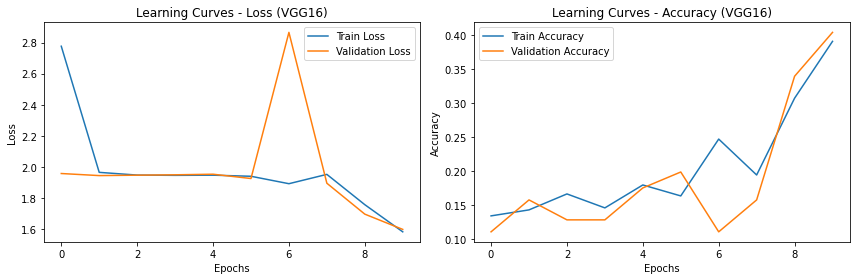

In [59]:
plot_learning_curves(model_vgg16.history, 'VGG16')

In [63]:
# Entraînement du modèle ResNet50
model_resnet50 = tf.keras.models.Sequential()
model_resnet50.add(pretrained_model_resnet50)
model_resnet50.add(tf.keras.layers.Flatten())
model_resnet50.add(tf.keras.layers.Dense(128, activation='relu'))
model_resnet50.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model_resnet50.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_resnet50.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical))

Epoch 1/10
22/22 [==============================] - 317s 12s/step - loss: 7.2440 - accuracy: 0.3787 - val_loss: 1703.9404 - val_accuracy: 0.1404
Epoch 2/10
22/22 [==============================] - 257s 12s/step - loss: 1.9305 - accuracy: 0.4401 - val_loss: 35.0022 - val_accuracy: 0.1637
Epoch 3/10
22/22 [==============================] - 218s 10s/step - loss: 1.3244 - accuracy: 0.5000 - val_loss: 1.9458 - val_accuracy: 0.1579
Epoch 4/10
22/22 [==============================] - 640s 30s/step - loss: 0.9702 - accuracy: 0.6477 - val_loss: 1.9458 - val_accuracy: 0.1579
Epoch 5/10
22/22 [==============================] - 147s 7s/step - loss: 0.6972 - accuracy: 0.7427 - val_loss: 1.9459 - val_accuracy: 0.1579
Epoch 6/10
22/22 [==============================] - 155s 7s/step - loss: 0.5197 - accuracy: 0.8260 - val_loss: 1.9857 - val_accuracy: 0.1696
Epoch 7/10
22/22 [==============================] - 152s 7s/step - loss: 0.4687 - accuracy: 0.8436 - val_loss: 13.1004 - val_accuracy: 0.1111
Epoc

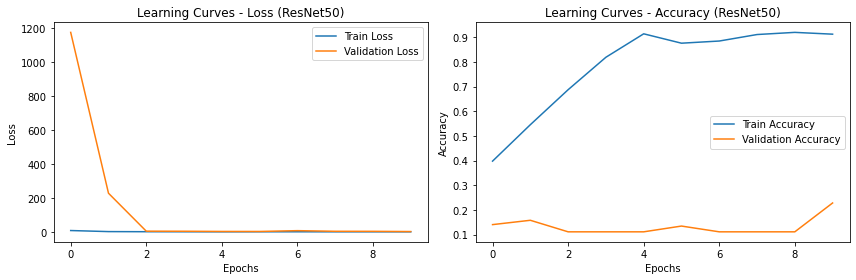

In [61]:
plot_learning_curves(model_resnet50.history, 'ResNet50')

In [64]:
# Entraînement du modèle InceptionV3

model_inceptionv3 = tf.keras.models.Sequential()
model_inceptionv3.add(pretrained_model_inceptionv3)
model_inceptionv3.add(tf.keras.layers.Flatten())
model_inceptionv3.add(tf.keras.layers.Dense(128, activation='relu'))
model_inceptionv3.add(tf.keras.layers.Dense(num_classes, activation='softmax'))
model_inceptionv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_inceptionv3.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical))

Epoch 1/10
22/22 [==============================] - 121s 5s/step - loss: 3.7685 - accuracy: 0.3348 - val_loss: 1306.1407 - val_accuracy: 0.1404
Epoch 2/10
22/22 [==============================] - 102s 5s/step - loss: 1.9207 - accuracy: 0.3275 - val_loss: 12035775.0000 - val_accuracy: 0.1579
Epoch 3/10
22/22 [==============================] - 103s 5s/step - loss: 1.4635 - accuracy: 0.4415 - val_loss: 1164650.3750 - val_accuracy: 0.1579
Epoch 4/10
22/22 [==============================] - 105s 5s/step - loss: 1.1958 - accuracy: 0.5175 - val_loss: 71016.3672 - val_accuracy: 0.1813
Epoch 5/10
22/22 [==============================] - 100s 5s/step - loss: 0.9784 - accuracy: 0.6170 - val_loss: 19893.5898 - val_accuracy: 0.1404
Epoch 6/10
22/22 [==============================] - 98s 4s/step - loss: 0.8001 - accuracy: 0.6784 - val_loss: 3156.6992 - val_accuracy: 0.2865
Epoch 7/10
22/22 [==============================] - 99s 5s/step - loss: 0.6940 - accuracy: 0.7047 - val_loss: 275.1520 - val_acc

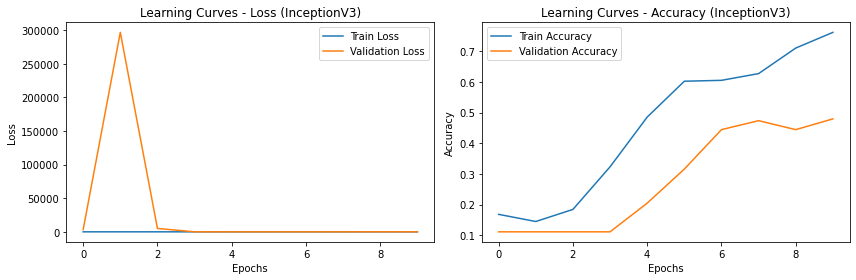

In [63]:
plot_learning_curves(model_inceptionv3.history, 'InceptionV3')

In [65]:
# Entraînement du modèle CNN personnalisé
custom_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
custom_model.fit(X_train, y_train_categorical, epochs=10, validation_data=(X_test, y_test_categorical))

Epoch 1/10
22/22 [==============================] - 30s 842ms/step - loss: 33.5451 - accuracy: 0.1769 - val_loss: 2.4255 - val_accuracy: 0.1404
Epoch 2/10
22/22 [==============================] - 18s 827ms/step - loss: 1.7158 - accuracy: 0.3889 - val_loss: 1.5709 - val_accuracy: 0.3509
Epoch 3/10
22/22 [==============================] - 18s 810ms/step - loss: 0.8313 - accuracy: 0.7515 - val_loss: 1.5533 - val_accuracy: 0.4386
Epoch 4/10
22/22 [==============================] - 17s 793ms/step - loss: 0.2345 - accuracy: 0.9430 - val_loss: 1.7651 - val_accuracy: 0.4444
Epoch 5/10
22/22 [==============================] - 17s 798ms/step - loss: 0.0974 - accuracy: 0.9751 - val_loss: 1.9852 - val_accuracy: 0.5029
Epoch 6/10
22/22 [==============================] - 17s 794ms/step - loss: 0.0494 - accuracy: 0.9912 - val_loss: 2.4088 - val_accuracy: 0.4444
Epoch 7/10
22/22 [==============================] - 18s 804ms/step - loss: 0.0330 - accuracy: 0.9927 - val_loss: 2.4824 - val_accuracy: 0.444

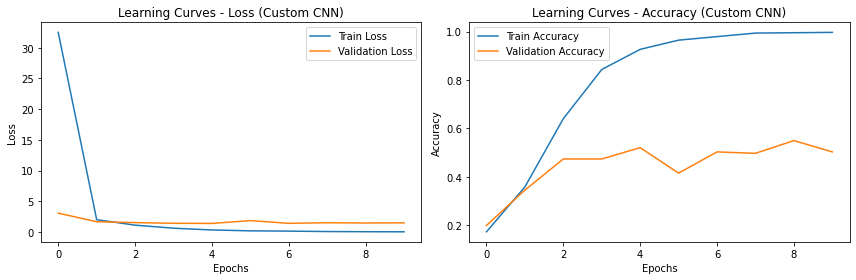

In [60]:
plot_learning_curves(custom_model.history, 'Custom CNN')

# Predict avec les différents models pour prédire les catégories

In [3]:
df_predict = data

NameError: name 'data' is not defined

In [71]:
df_predict.head()

,uniq_id,label_name,image_path,label
0,55b85ea15a1536d46b7190ad6fff8ce7,Home Furnishing,55b85ea15a1536d46b7190ad6fff8ce7.jpg,1
1,7b72c92c2f6c40268628ec5f14c6d590,Baby Care,7b72c92c2f6c40268628ec5f14c6d590.jpg,2
2,64d5d4a258243731dc7bbb1eef49ad74,Baby Care,64d5d4a258243731dc7bbb1eef49ad74.jpg,2
3,d4684dcdc759dd9cdf41504698d737d8,Home Furnishing,d4684dcdc759dd9cdf41504698d737d8.jpg,1
4,6325b6870c54cd47be6ebfbffa620ec7,Home Furnishing,6325b6870c54cd47be6ebfbffa620ec7.jpg,1


In [72]:
# Créer le tableau de correspondance
label_mapping = df_predict.groupby('label')['label_name'].first().reset_index()

# Afficher le tableau
print(label_mapping)

   label                  label_name
0      1             Home Furnishing
1      2                   Baby Care
2      3                     Watches
3      4  Home Decor & Festive Needs
4      5            Kitchen & Dining
5      6    Beauty and Personal Care
6      7                   Computers


In [73]:
# Dossier contenant les images
image_folder = "predict_data"

# Dossier de destination pour les images redimensionnées
resized_folder = "predict_data_resized"

# Créer le dossier de destination s'il n'existe pas
if not os.path.exists(resized_folder):
    os.makedirs(resized_folder)

# Parcourir les fichiers du dossier d'origine et redimensionner les images
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    output_path = os.path.join(resized_folder, filename)
    if os.path.isfile(image_path):
        resize_image(image_path, output_path, (224, 224))
    else:
        print(f"Image not found: {filename}")

Image not found: .ipynb_checkpoints


In [74]:
import cv2
import numpy as np
from tensorflow import keras

# Obtenez la liste des fichiers d'images
image_files = os.listdir(resized_folder)

# Charger les modèles entraînés
model1 = model_vgg16
model2 = model_resnet50
model3 = model_inceptionv3
model4 = custom_model

In [2]:
# Boucle sur les fichiers d'images
for image_file in image_files:
    # Vérifier si le fichier est .ipynb_checkpoints
    if image_file.endswith(".ipynb_checkpoints"):
        continue
    
    # Chemin complet de l'image
    image_path = os.path.join(resized_folder, image_file)  

    # Charger et prétraiter l'image
    image = cv2.imread(image_path,0) # convert in gray
    if image is None:
        print(f"Failed to load image: {image_file}")
        continue
        
    image = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(image, None)
    img=cv2.drawKeypoints(image,kp,image)
    
    sift_keypoints = []
    temps1=time.time()
    sift = cv2.SIFT_create(500)

    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

    sift_keypoints_by_img = np.asarray(sift_keypoints)
    sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)
    
    # Effectuer la prédiction avec chaque modèle
    prediction1 = model1.predict(np.expand_dims(image, axis=0))
    prediction2 = model2.predict(np.expand_dims(image, axis=0))
    prediction3 = model3.predict(np.expand_dims(image, axis=0))
    prediction4 = model4.predict(np.expand_dims(image, axis=0))

    # Obtenir la classe prédite et la probabilité associée
    class1 = np.argmax(prediction1)
    class2 = np.argmax(prediction2)
    class3 = np.argmax(prediction3)
    class4 = np.argmax(prediction4)

    prob1 = np.max(prediction1)
    prob2 = np.max(prediction2)
    prob3 = np.max(prediction3)
    prob4 = np.max(prediction4)
    
    # Récupérer le label correspondant à la classe prédite
    label_name = df_predict.loc[class4, 'label_name']
    
    plt.imshow(img)

    # Afficher les résultats
    print('Model 1 predicts (Probability = ',prob1,'):', label_name)
    print('Model 2 predicts (Probability = ',prob2,'):', label_name)
    print('Model 3 predicts (Probability = ',prob3,'):', label_name)
    print('Model 4 predicts (Probability = ',prob4,'):', label_name)

NameError: name 'image_files' is not defined

In [ ]:
# Boucle sur les fichiers d'images
for image_file in image_files:
    # Vérifier si le fichier est .ipynb_checkpoints
    if image_file.endswith(".ipynb_checkpoints"):
        continue
    
    # Chemin complet de l'image
    image_path = os.path.join(resized_folder, image_file)  

    # Charger et prétraiter l'image
    image = cv2.imread(image_path,0) # convert in gray
    if image is None:
        print(f"Failed to load image: {image_file}")
        continue
        
    image = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(image, None)
    img=cv2.drawKeypoints(image,kp,image)
    
    sift_keypoints = []
    temps1=time.time()
    sift = cv2.SIFT_create(500)

    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

    sift_keypoints_by_img = np.asarray(sift_keypoints)
    sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)
    
    # Effectuer la prédiction avec chaque modèle
    prediction1 = model1.predict(np.expand_dims(image, axis=0))
    prediction2 = model2.predict(np.expand_dims(image, axis=0))
    prediction3 = model3.predict(np.expand_dims(image, axis=0))
    prediction4 = model4.predict(np.expand_dims(image, axis=0))

    # Obtenir la classe prédite et la probabilité associée
    class1 = np.argmax(prediction1)
    class2 = np.argmax(prediction2)
    class3 = np.argmax(prediction3)
    class4 = np.argmax(prediction4)

    prob1 = np.max(prediction1)
    prob2 = np.max(prediction2)
    prob3 = np.max(prediction3)
    prob4 = np.max(prediction4)
    
    # Récupérer le label correspondant à la classe prédite
    label_name = df_predict.loc[class4, 'label_name']
    
    plt.imshow(img)

    # Afficher les résultats
    print('Model 1 predicts (Probability = ',prob1,'):', label_name)
    print('Model 2 predicts (Probability = ',prob2,'):', label_name)
    print('Model 3 predicts (Probability = ',prob3,'):', label_name)
    print('Model 4 predicts (Probability = ',prob4,'):', label_name)